In [1]:
import torch
import torch.nn as nn
import random
import gym
import gym_super_mario_bros
from nes_py.wrappers import JoypadSpace
from gym_super_mario_bros import SuperMarioBrosEnv
from tqdm import tqdm
import pickle 
import gym
import numpy as np
import collections 
import cv2
import matplotlib.pyplot as plt
import time
import datetime
import json
from toolkit.gym_env import *
from toolkit.action_utils import *
from toolkit.marlios_model import *
from toolkit.train_marlios import *
from toolkit.constants import *
from toolkit.train_test_samples import *
import warnings

warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: witz (marlios). Use `wandb login --relogin` to force relogin


100%|██████████| 1000/1000 [7:23:38<00:00, 26.62s/it]    


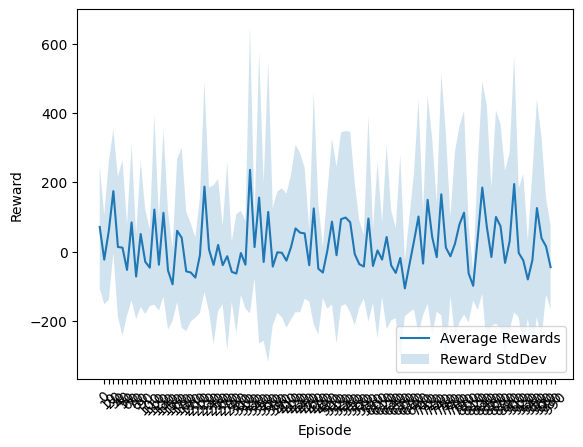

avg_loss,█▇▇▆▅▅▅▄▂▂▂▃▁▂▃▃▂▂▂▂▃▂▃▃▃▃▃▂▂▂▃▃▅▄▃▃▃▃▂▂
avg_std_dev,▁▄▄▅▄▃▄▄▄▄▄▃▄▃██▄▅▄▆▄▅▅▂▃▅▃▂▃▆▇▅▆▄▄▆▇▅▅▃
avg_total_rewards,▃▅▄▅▅▂▂▅▂▃▄▃▂▃▇▆▃▅▅▆▄▃▅▂▃▄▂▁▃▄▇▄▆▄▃▅█▃▃▄
current exploration,█▇▆▅▅▄▃▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
current lr,██▇▇▇▇▆▆▆▆▆▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁
flag acquired,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
max_time_per_ep,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
time,▄▃███████████▂███████▁▁██▂█████████▇██▂▂
total reward,▂▄▁▆▃▆▁▅▁▁▁▁▁▄▁▅▁▁▄▁▁▄▄▁▁▄▁▁▄▁▁▂▅▁▁█▁▁▃▄
x_position,▂▃▁▆▃▆▁▅▁▁▁▁▁▃▁▅▁▁▄▁▁▃▃▁▁▃▁▁▄▁▁▂▅▁▁█▁▁▃▃
avg_loss,0.55599


In [2]:
train(
    name="Continuation of Run 1682477759",
    training_mode=True, 
    pretrained=True, # use the pretrained model
    ep_per_stat=500, 
    gamma=0.9,
    num_episodes=10000,
    run_id="1682477759",
    lr=3.6e-6, # starting here because the last one was about here when it stopped
    lr_decay= 0.999,
    exploration_min=0.1,
    exploration_max = 0.2, # setting this to the min for the rerun model
    exploration_decay=0.995, 
    action_space=TRAIN_SET,
    n_actions=64,
    debug=True,
    device='mps',
    max_time_per_ep=150 # limit runs to 200 seconds
    )

# train(
#     name="Lowering min lr by a factor of ten",
#     training_mode=True, 
#     pretrained=True, # use the pretrained model
#     ep_per_stat=100, 
#     gamma=0.9,
#     num_episodes=3000,
#     run_id='1682283822',
#     lr=1e-8,
#     lr_decay= 0.999,
#     exploration_min=0.02,
#     exploration_max = 0.02, # setting this to the min for the rerun model
#     exploration_decay=0.995, 
#     action_space=SIMPLE_MOVEMENT,
#     n_actions=len(SIMPLE_MOVEMENT),
#     debug=True,
#     device='mps',
#     max_time_per_ep=150 # limit runs to 200 seconds
#     )


In [ ]:
# only need to run if you cut the above off early, even then you don't 'have' to but it will do it automatically for you, it's just not as nice to have the output above as well
wandb.finish()

In [ ]:
# checking out the run on simple movement
run_id='1682477759'
visualize(run_id=run_id, action_space=SIMPLE_MOVEMENT, n_actions=len(SIMPLE_MOVEMENT))


In [ ]:
# cp ModelCheckpoints/*1682283822* . resetting this run here

total_rewards = load_item('total_rewards-{}.pkl'.format(run_id))
plot_rewards(ep_per_stat=100, total_rewards=total_rewards)